In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from requests.compat import basestring

In [2]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

#### Treemap: Goals by Team and Position

In [3]:
team_position_goals = ucl.groupby(['Team','Position'])['Goals'].sum().reset_index()

In [4]:
ucl['Team'] =  ucl['Team'].str.strip(" ")
ucl['Competitions'] = ucl['Competitions'].str.strip(" ")

In [5]:
fig = px.treemap(
    team_position_goals,
    path=['Team', 'Position'],
    values='Goals',
    title='Treemap: Goals Scored by Team and Position',
    color='Goals',
)

fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [6]:
ucl['Total_Contrib'] = ucl['Goals'] + ucl['Assists']

In [7]:
ucl['Defensive_Score'] = ucl['Tackles_Won'] + ucl['Balls_recovered']

# 2) Grupim sipas Team → Position → Player, me Defensive_Score
defense_team = (
    ucl.groupby(['Team', 'Position', 'Player'])['Defensive_Score']
    .sum()
    .reset_index()
)

In [8]:
fig = px.treemap(
    defense_team,
    path=['Team', 'Position', 'Player'],
    values='Defensive_Score',
    title='Treemap: Defensive Contributions by Team, Position and Player',
    color='Defensive_Score',
    color_continuous_scale='OrRd'
)

fig.update_layout(margin=dict(t=60, l=0, r=0, b=0))
fig.show()

In [9]:
nationality_counts = ucl['Nationality'].value_counts()
print(nationality_counts)

Nationality
France           24
Netherlands      18
Germany          16
Spain            16
Brazil           15
Italy            11
England          11
Argentina        10
Belgium           9
Portugal          9
Switzerland       6
Turkey            5
Norway            4
Croatia           4
Morocco           3
Poland            3
Denmark           3
Canada            3
Uruguay           3
Scotland          3
United States     2
Slovenia          2
Japan             2
Ecuador           2
Ukraine           2
Ivory Coast       2
Greece            2
Georgia           2
Colombia          2
Nigeria           2
Algeria           1
Hungary           1
Iran              1
Mexico            1
Armenia           1
Portugal          1
BosniaH           1
Senegal           1
South Korea       1
Egypt             1
Sweden            1
Ghana             1
Austria           1
Russia            1
Name: count, dtype: int64


In [10]:
nationality_counts = ucl['Nationality'].value_counts().head(20).reset_index()
nationality_counts.columns = ['Nationality', 'Count']

nationality_counts

,Nationality,Count
0,France,24
1,Netherlands,18
2,Germany,16
3,Spain,16
4,Brazil,15
5,Italy,11
6,England,11
7,Argentina,10
8,Belgium,9
9,Portugal,9


In [11]:
teams_sf = ucl.loc[ucl['Phase'] == 'Semi_finals', 'Team'].unique()

print("Skuadrat në Semi-finals:", teams_sf)

Skuadrat në Semi-finals: ['Arsenal FC' 'Barcelona']


In [12]:
teams_final = ucl.loc[ucl['Phase'] == 'Final', 'Team'].unique()

print("Skuadrat në Final:", teams_final)

Skuadrat në Final: ['Inter' 'Paris SG']


In [13]:
teams_qf = ucl.loc[ucl['Phase'] == 'Quarter_finals', 'Team'].unique()

print("Skuadrat në Quarter finals:", teams_qf)

Skuadrat në Quarter finals: ['Real Madrid' 'BVB Dortmund' 'Aston Villa' 'Bayern Munich']


In [14]:
teams_r16 = ucl.loc[ucl['Phase'] == 'Round16', 'Team'].unique()

print("Skuadrat ne Round 16:", teams_r16)

Skuadrat ne Round 16: ['Liverpool FC' 'Club Brugge' 'Benfica' 'Atletico Madrid' 'PSV Eindhoven'
 'Lille' 'Bayer Leverkusen' 'Feyenoord']


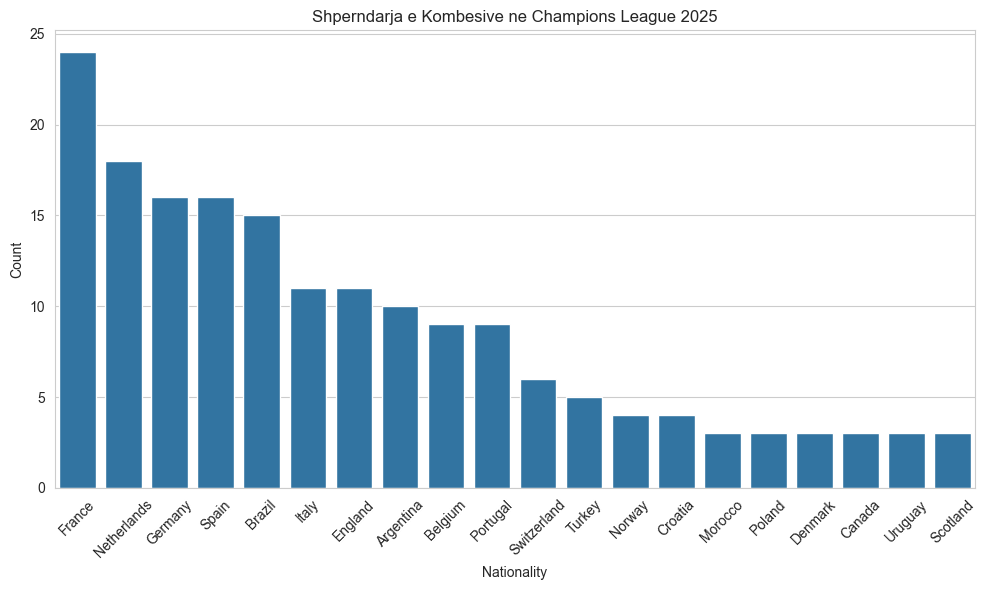

In [15]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Nationality', data=ucl, order=nationality_counts['Nationality'].head(20))
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Shperndarja e Kombesive ne Champions League 2025')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
ucl.groupby('Nationality')['Player'].count().sort_values(ascending=False)

Nationality
France           24
Netherlands      18
Spain            16
Germany          16
Brazil           15
Italy            11
England          11
Argentina        10
Belgium           9
Portugal          9
Switzerland       6
Turkey            5
Croatia           4
Norway            4
Uruguay           3
Poland            3
Scotland          3
Morocco           3
Canada            3
Denmark           3
Ukraine           2
United States     2
Slovenia          2
Nigeria           2
Colombia          2
Ecuador           2
Greece            2
Georgia           2
Japan             2
Ivory Coast       2
Armenia           1
Austria           1
BosniaH           1
Algeria           1
Egypt             1
Hungary           1
Mexico            1
Iran              1
Ghana             1
Portugal          1
Senegal           1
Russia            1
Sweden            1
South Korea       1
Name: Player, dtype: int64

In [17]:
unique_teams_series = pd.Series(ucl['Nationality'].unique())
print(unique_teams_series)

0            France
1             Italy
2            Poland
3            Brazil
4       Netherlands
5           England
6            Norway
7           Morocco
8           Belgium
9         Argentina
10           Canada
11    United States
12            Spain
13          Algeria
14         Portugal
15          Germany
16          Georgia
17          Hungary
18         Scotland
19           Turkey
20           Greece
21             Iran
22          Ecuador
23           Mexico
24         Slovenia
25            Japan
26          Uruguay
27          Croatia
28      Switzerland
29        Portugal 
30          Denmark
31          Armenia
32          BosniaH
33          Senegal
34      Ivory Coast
35          Ukraine
36            Egypt
37      South Korea
38          Nigeria
39           Sweden
40            Ghana
41          Austria
42         Colombia
43           Russia
dtype: object


In [18]:
ucl.head(10)


,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP,Total_Contrib,Defensive_Score
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,5,0,0,0,0,861,10,0,0,55
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,15,0,0,0,2,994,13,2,2,40
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,1,0,0,0,2,985,13,1,11,15
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,7,0,0,0,3,1225,14,0,22,20
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,3,0,0,0,0,840,9,1,1,54
5,6,Jude Bellingham,Forward,21,England,Real Madrid,La Liga,Quarter_finals,B,180.0,...,23,0,0,0,1,1136,13,1,5,49
6,7,Odegaard,Midfielder,26,Norway,Arsenal FC,Premier League,Semi_finals,A,100.0,...,2,0,0,0,1,798,11,3,4,12
7,8,Brahim Diaz,Forward,25,Morocco,Real Madrid,La Liga,Quarter_finals,B,45.0,...,6,0,0,0,0,479,11,3,3,17
8,9,Hans Vanaken,Midfielder,32,Belgium,Club Brugge,Pro League,Round16,C,7.0,...,9,0,0,0,1,1080,12,0,2,36
9,10,Otamendi,Defender,37,Argentina,Benfica,Liga Portugal,Round16,C,1.0,...,14,0,0,0,0,1080,12,0,1,102


In [19]:
# Get the top 5 clubs with the most total attempts on target
top_clubs_shots= ucl.groupby('Team')['Total_attempts'].sum().nlargest(5).reset_index()
top_clubs_shots


,Team,Total_attempts
0,Paris SG,279
1,Barcelona,202
2,Bayern Munich,194
3,Real Madrid,181
4,PSV Eindhoven,157


In [20]:
from turtle import st
fig = px.funnel(top_clubs_shots,x='Total_attempts',y='Team',title='Top 5 Teams with the Most Total Attempts on Target',orientation='h',labels={'Total_attempts':'Total Attempts on Target'})

fig.update_layout(
    xaxis_title='Total Attempts on Target',
    yaxis_title='Team',
    showlegend=False,
    template='plotly_dark',
    width=800,
    height=600,
)
fig.show()


In [21]:
ucl['Phase_Tier'] = ucl['Phase_Tier'].str.strip(" ")
ucl['Phase_Tier'] = ucl['Phase_Tier'].str.strip().str.upper()

In [22]:
ucl['Performance_Coefficient'] = (
    ucl['Rating'] * 0.5 +
    ucl['Minutes_played'] * 0.002 +
    ucl['Match_played'] * 1.1 +
    ucl['Goals'] * 0.7 + +
    ucl['Assists'] * 0.3 +
    ucl['Total_attempts'] * 0.5 +
    ucl['MOTM_Awards'] * 0.2 +
    ucl['Balls_recovered'] * 0.1
)

In [23]:
team_coefficient = ucl.groupby('Team')['Performance_Coefficient'].mean().reset_index()
team_coefficient = team_coefficient.sort_values('Performance_Coefficient', ascending=False)

In [24]:
team_coefficient['Performance_Coefficient'] = team_coefficient['Performance_Coefficient'].round(3)

In [25]:
fig = px.bar(
    team_coefficient.head(10),
    x='Team',
    y='Performance_Coefficient',
    title='Top 10 Skuadrat në Champions League sipas Koeficientit të Performancës',
    color='Performance_Coefficient',
    text='Performance_Coefficient'
)

fig.update_layout(xaxis_title="Team", yaxis_title="Performance Coefficient", uniformtext_minsize=8
                  , uniformtext_mode='hide', template='plotly_dark', width=800, height=600)
fig.show()

In [26]:
top_recovers = ucl[ucl['Balls_recovered'] > 0].sort_values('Balls_recovered', ascending=False).head(15)

In [27]:
fig = px.bar(
    top_recovers,
    x='Player',
    y='Balls_recovered',
    title='Top 15 Players with the Most Balls Recovered in the Champions League',
    color='Balls_recovered',
    text='Balls_recovered',
    hover_data=['Position', 'Team']
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

#### 🔶  Treemap – për të shfaqur numrin e golave nga lojtarët brenda skuadrave

In [28]:
fig = px.treemap(
    ucl[ucl['Goals'] > 0],  # vetëm ata që kanë shënuar gola
    path=['Team', 'Player','Goals'],
    color='Position',
    values='Goals',
    title='Goals per Player brenda qdo Ekipi'
)
fig.update_layout(width=1000, height=800)
fig.show()

In [29]:
fig = px.treemap(
    ucl[ucl['Assists'] > 0],  # vetëm ata që kanë shënuar gola
    path=['Team', 'Player','Assists'],
    color='Position',
    values='Assists',
    title='Assists per Player brenda qdo Ekipi'
)
fig.update_layout(width=1000, height=800)
fig.show()

#### 🔆 Sunburst Chart – për të parë strukturën Kombësi → Skuadër → Lojtar

In [30]:
fig = px.sunburst(
    ucl,
    path=['Team', 'Nationality',],
    values='PlayerID',
    title='Sunburst: What nationalities were the players in the teams in the Champions League 2025',
    color='Nationality'
)
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

#### 📈 Line Plot – për performancë krahasuese mes lojtarëve në bazë të Rating / Gola

In [31]:
fig = px.line(ucl, x='Player', y='Goals', title='Rating per Player', text='Goals',  color='Position', template='plotly_dark')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [32]:
nationality_counts = ucl['Nationality'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

fig = px.choropleth(
    nationality_counts,
    locations='Nationality',
    locationmode='country names',
    color='Count',
    title='Shpërndarja e Lojtarëve sipas Kombësisë'
)

fig.update_layout(
    margin=dict(t=40, l=0, r=0, b=0),
    width=800,
    height=600,
    geo=dict(showland=True, landcolor='rgb(217, 217, 217)')
)
fig.show()

#### 🏆 Champions League Player of the Season and 3 Nominees for Ballon d'Or 2025

In [37]:
ucl['Best_Player_Performance'] = (
    ucl['Minutes_played'] * 0.006 +
    ucl['DistanceCovered(km)'] * 0.008 +
    ucl['Goals'] * 0.6 +
    ucl['Assists'] * 0.6 +
    ucl['Rating'] * 2 +
    ucl['Total_attempts'] * 0.6 +
    ucl['Dribbles'] * 0.2
)

In [40]:
best_player = ucl.sort_values('Best_Player_Performance', ascending=False).head(3)
best_player[['Player','Age','Team','Best_Player_Performance']]

,Player,Age,Team,Best_Player_Performance
75,Dembele,27,Paris SG,83.0068
15,Yamal,17,Barcelona,81.0564
3,Raphinha,28,Barcelona,74.1844


In [44]:
fig = px.bar(
    best_player,
    x='Player',
    y='Best_Player_Performance',
    color='Team',
    text='Best_Player_Performance',
    title="Champions League Player of the Season and 3 Nominees for Ballon d'Or 2025🥇⚽",
)

# Formatim
fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_title='Performance Score',
    xaxis_title='Player',
    title_font_size=18
)

fig.show()